<a href="https://colab.research.google.com/github/nvamsikrishna05/KaggleTitanic/blob/master/KaggleTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
upload = files.upload()

Saving final_titatic_data.csv to final_titatic_data.csv
Saving titanic.zip to titanic.zip


In [3]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Importing the required libraries

In [4]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import missingno as msno
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the dataset

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Observations So Far:

- Training Data has 891 Observations with 12 Features (Including the target variable)
- Of these features 5 are Categorical features - Name, Sex, Ticket, Cabin, Embarked

## Data Distributions

### Summary Statistics of the Data

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Oreskovic, Mr. Luka",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### From the Above Summary Data, we can infer the following - 

- Male Population is High compared to the Femal Population
- People Embarked from Location S is Higher compared to Other Locations
- Age is missing some values
- Most of the Poeple don't have a Parent/Children onboard the Ship
- People didnt bring Siblings/ Spouses onboard the train but more pople had brought compared to the Parents/Children

## Categorical Data EDA

### Let's Check the distribution of the Target Variable - How many Survived Vs Not

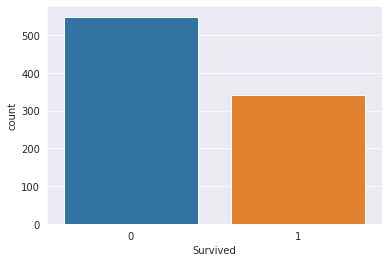

In [ ]:
sns.countplot(x = df.Survived, data = df)
plt.show()

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Let's Check the Gender Distribution

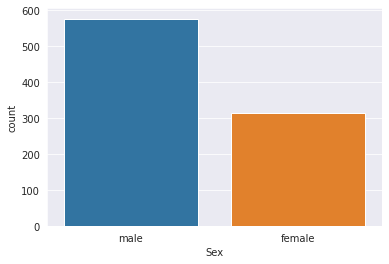

In [ ]:
sns.countplot(x =df.Sex, data= df)
plt.show()

In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Let's Check the Survival Data based on Gender

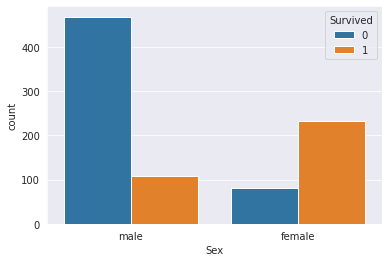

In [ ]:
sns.countplot(x = df.Sex, hue = df['Survived'], data = df)
plt.show()

In [ ]:
survived_df = df[df.Survived == 1]

male_survived = (survived_df[survived_df.Sex == 'male'].Survived.value_counts()  / survived_df.Survived.value_counts() ) * 100
female_survived = (survived_df[survived_df.Sex == 'female'].Survived.value_counts() / survived_df.Survived.value_counts()) * 100

print(f"Out of the Total Survived Population, Male Survived Population % = {male_survived}")
print(f"Out of the Total Survived Population, Female Survived Population % = {female_survived}")

Out of the Total Survived Population, Male Survived Population % = 1    31.871345
Name: Survived, dtype: float64
Out of the Total Survived Population, Female Survived Population % = 1    68.128655
Name: Survived, dtype: float64


### Let's Check Survival Data based on the Ticket Class

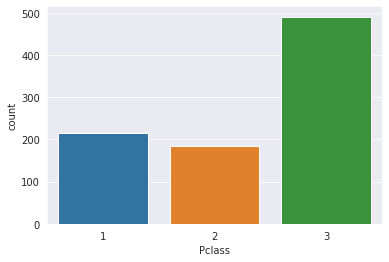

In [ ]:
sns.countplot(x = df.Pclass, data = df)

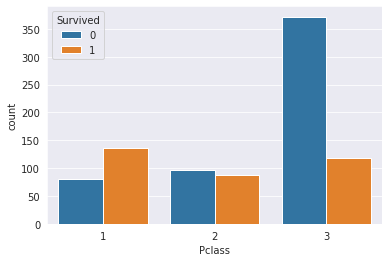

In [ ]:
sns.countplot(x = df.Pclass, hue=df.Survived, data = df)
plt.show()

### Let's Check Survival Against Embarked

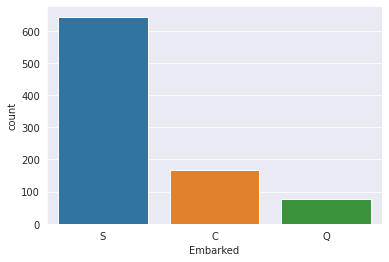

In [ ]:
sns.countplot(x = df.Embarked, data = df)
plt.show()

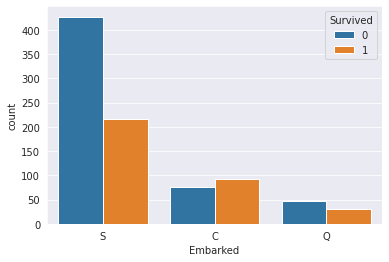

In [ ]:
sns.countplot(x = df.Embarked, hue = df.Survived, data = df)
plt.show()

In [ ]:
grouped_data = df.groupby(['Embarked', 'Survived']).agg({'Survived': 'count'})
grouped_data['%'] = grouped_data.apply(lambda x: x*100/float(x.sum()))
grouped_data

Survived          %
Embarked Survived                     
C        0               75   8.436445
         1               93  10.461192
Q        0               47   5.286839
         1               30   3.374578
S        0              427  48.031496
         1              217  24.409449

### Age Distribution

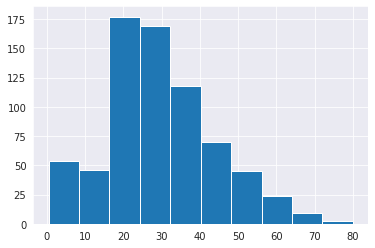

In [ ]:
df.Age.hist()

### Observations So Far:

- Generally based on the data more no of people didn't survive. Of the 891 Observations, 541 people didn't survive and 349 people did survive
- Most of the People are of the Age group 20-40
- Gender distribution is skewed towards Male population
- Female population is more likely to survive compared to Male population
- Of the Passenger Classes, 1st Class % is having more chance to survive compared to 2nd class % compared to 3rd class %

### Let's do numeric data EDA

### Let's Check the Age Group and Survival

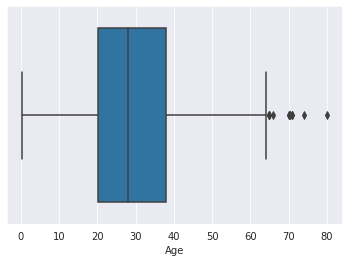

In [ ]:
sns.boxplot(x = df.Age, data = df)

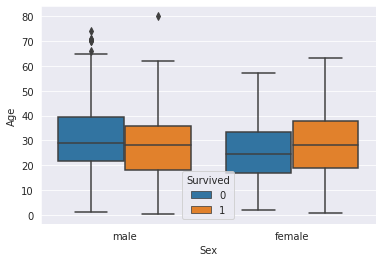

In [ ]:
sns.boxplot(x = df.Sex, y = df.Age, hue= "Survived", data = df)
plt.show()

### From the Above, we can infer the following -

- People Age is between 20- 40 mostly with a few outliers above 60
- In Male Population Younger Chances of Survival are more compared to the female population by slight marign.


### Let's Check Survival for People with Siblings/Spouses

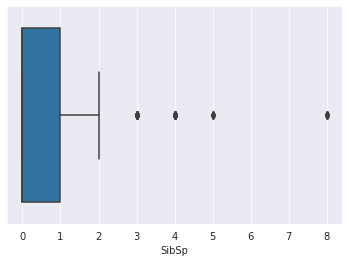

In [ ]:
sns.boxplot(x = df.SibSp, data = df)
plt.show()

In [ ]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

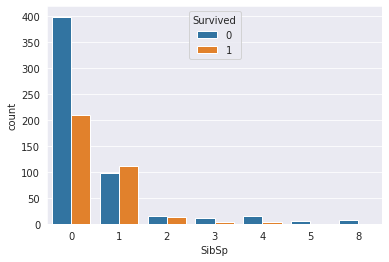

In [ ]:
sns.countplot(x = df.SibSp, hue = df.Survived, data = df)

#### From the Above, we can infer, people's survival chances didn't increase if they don't have any spouses or siblings

### Let's Check people's survival based on Parents/ Children onboard

In [ ]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

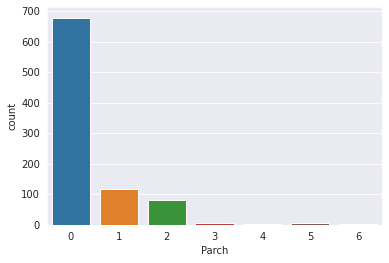

In [ ]:
sns.countplot(x = df.Parch, data = df)

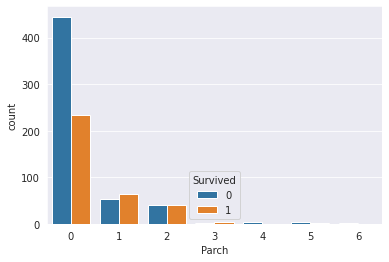

In [ ]:
sns.countplot(x = df.Parch, hue = df.Survived, data = df)
plt.show()

#### From the Above, we can infer people's survival chances didn't improve if they didn't had any parents or children. InFact their chances are better if they had a parent or child

## Identifying Missing Values

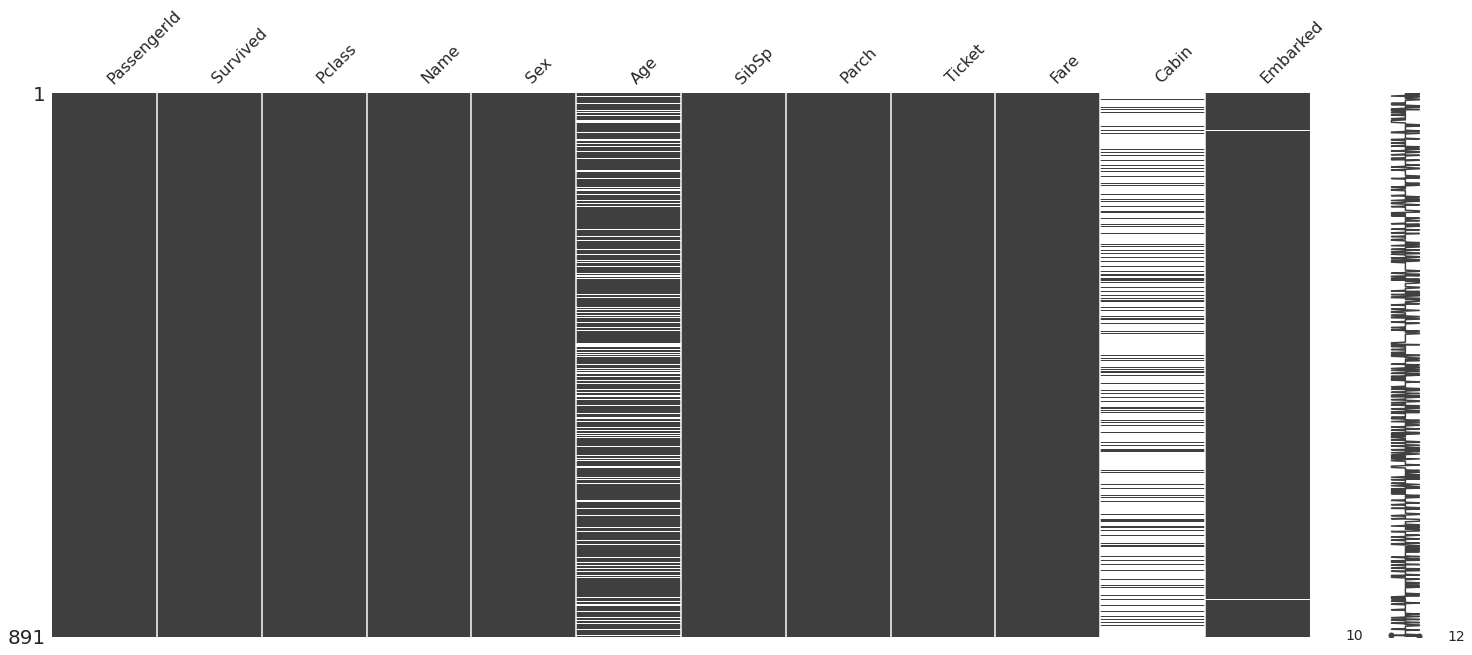

In [ ]:
msno.matrix(df)

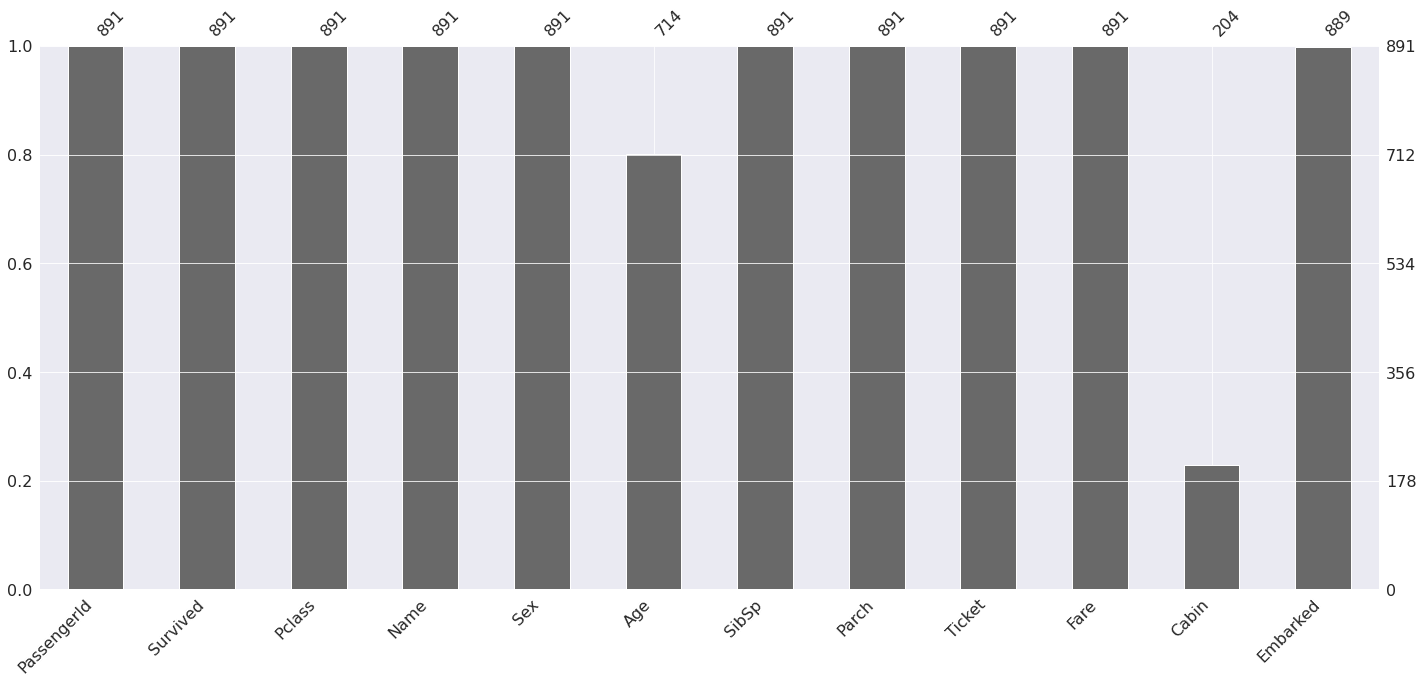

In [ ]:
msno.bar(df)

### Observations So Far:

We have missing values for the features - 

*   Age
*   Cabin
*   Embarked

Let's Check the percentage of missing Values for the Data - 



In [ ]:
df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

From the Data Above, we can observe that -

- Age has around 20% missing data
- Cabin has around 77% missing data
- Embarked has less than 1% missing data

While Embarked missing data % is well within the limits, Age and Cabin Data have more missing values than we can accomodate.

### Checking for Duplicated Observations

In [ ]:
df.duplicated().sum()

0

### From the Above, we can infer that there are no duplicate observations in our data

## Let's See the Corelation Between the Features

In [ ]:
correlations = df.corr()
correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


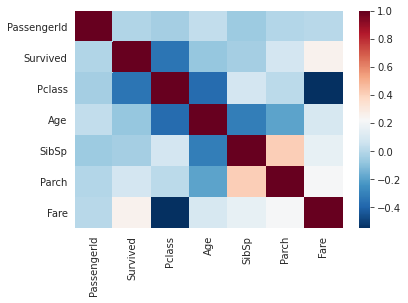

In [ ]:
sns.heatmap(data = correlations, cmap = 'RdBu_r')
plt.show()

### From the CoRelation map, we can make the following observations - 

- Survival isn't much correlated to the Sibling/Sposes onboard the ship
- Survival isn't much correlated to the Fare also as much
- Survival shows Inversely Co-related to the Passenger Class but since Passenger Class is more of a Categorical Feature, we can ignore it.

## Let's See the Outliers in the Data

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


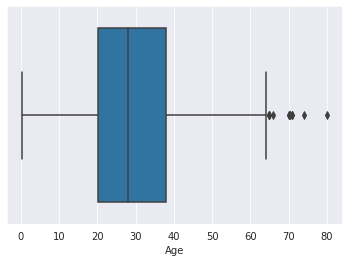

In [ ]:
sns.boxplot(x = df.Age)
plt.show()

#### From the above, we can infer that we have few people above the Age 60+ who are outliers

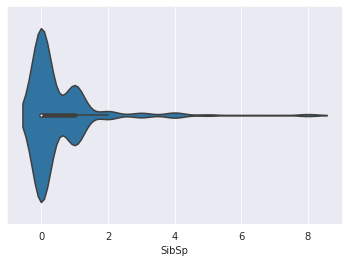

In [ ]:
sns.violinplot(x = df.SibSp)
plt.show()

In [ ]:
df.groupby('SibSp').agg(['count'])

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
,count,count,count,count,count,count,count,count,count,count,count
SibSp,,,,,,,,,,,
0,608,608,608,608,608,471,608,608,608,126,606
1,209,209,209,209,209,183,209,209,209,69,209
2,28,28,28,28,28,25,28,28,28,6,28
3,16,16,16,16,16,12,16,16,16,3,16
4,18,18,18,18,18,18,18,18,18,0,18
5,5,5,5,5,5,5,5,5,5,0,5
8,7,7,7,7,7,0,7,7,7,0,7


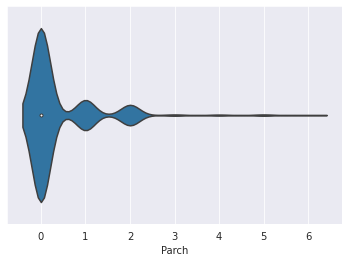

In [ ]:
sns.violinplot(x = df.Parch)

In [ ]:
df.groupby('Parch').agg(['count'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
,count,count,count,count,count,count,count,count,count,count,count
Parch,,,,,,,,,,,
0,678,678,678,678,678,521,678,678,678,141,676
1,118,118,118,118,118,110,118,118,118,39,118
2,80,80,80,80,80,68,80,80,80,23,80
3,5,5,5,5,5,5,5,5,5,0,5
4,4,4,4,4,4,4,4,4,4,1,4
5,5,5,5,5,5,5,5,5,5,0,5
6,1,1,1,1,1,1,1,1,1,0,1


From the Above, we can observe that - 

- People with Parents/Children onboard are very few with most of the poeple without any parents/children onboard the ship.

- People with Siblings/Spouses onboard are also very few with most of the poeple without any siblings/spouses onboard the ship.

- When we observe the Data Distribution, we can see that people with more than 2 People with Parents/Children, Siblings/Spouses obboard the ship are very few but since they are valid observation i.e. people can have those many family members we will keep the observations.

- We can even Observe that People Survival rate is also better for these people who have more family members onboard.

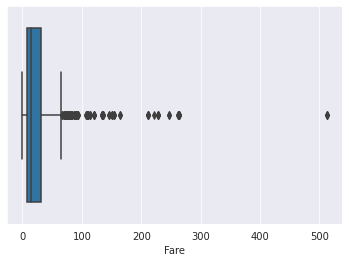

In [ ]:
sns.boxplot(x = df.Fare)
plt.show()

Let's Check the Outliers Interms of Survival

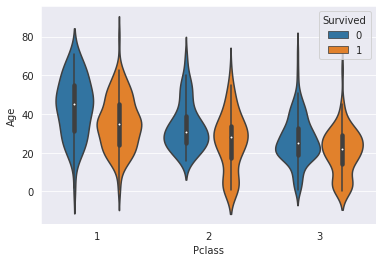

In [ ]:
sns.violinplot(x = df.Pclass , y = df.Age, hue = 'Survived', data = df)
plt.show()

From the Above we can Infer that - 

- Passenger Class played a role on Survival with 1st class people survival much better compared to the 2nd class and 3rd class people.

- People with Age over 60 Outlier Survival rate is also better in the First Class

- Infants in the Class 2 and CLass 3 Survival is much better though elderly survival rate suffered in the Class 2 and Class 3

## Missing Value Imputations

#### Let's Check the Missing Values Percentages for each feature

In [ ]:
df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
df.isnull().sum()/ len(df) 

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Let's Impute Missing Values for Embarked

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
first_class = df['Pclass'] == 1
female_people = df['Sex'] == 'female'
no_siblings = df['SibSp'] == 0
no_parents = df['Parch'] == 0

In [ ]:
filtered_df = df[first_class & female_people & no_siblings & no_parents]
filtered_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C


In [ ]:
filtered_df.Embarked.value_counts()

C    18
S    14
Name: Embarked, dtype: int64

#### Observations: After Filtering the Data based on the Common criteria for the Missing Enbarked Values, we can Observe that -  

Class - **C** is the most common category for Embarked. So, we'll Impute Embarked with Class **C**

In [ ]:
df_copy = df.drop('PassengerId', axis=1)

In [ ]:
df_copy.fillna({
    'Embarked': 'C'
}, inplace=True)

#### Let's Recheck the Data to confirm if Embarked Missing values have been Imputed -

In [ ]:
df_copy.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [ ]:
def plot_correlationmap(df):
  # Set the Plot Size
  plt.figure(figsize=(10, 10))
  sns.set_style('white')
  # Fetch the Correlation Matrix
  correlations = df_copy.corr()
  # Display 1 Half of the Map to Avoid Duplicate of HeatMap and Screen Clutter
  boolean_mask = np.zeros_like(correlations)
  upperTriangle = np.triu_indices_from(boolean_mask)
  boolean_mask[upperTriangle] = 1

  sns.heatmap(correlations * 100, cmap='RdBu_r', annot= True, fmt='0.0f', mask=boolean_mask)

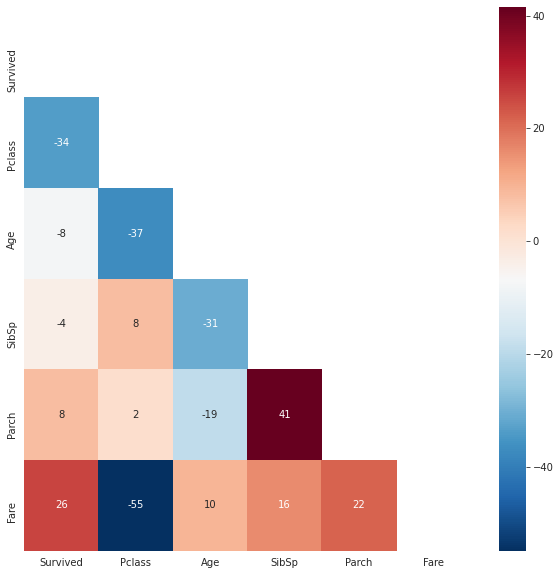

In [ ]:
plot_correlationmap(df_copy)

#### From the Above Correlation Matrix, we can Observe that Age is't much Corelated to Other Criteria. The Only Inverse Correlation we can see is that with Passenger Class. So, we'll Impute the Age value with the Mean value by the group of Passenger Class

In [ ]:
df_copy.Age = df.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
df_copy.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [ ]:
df_copy.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,891
unique,891,2,681,147,3
top,"Van Impe, Mr. Jean Baptiste",male,347082,G6,S
freq,1,577,7,4,644


From the Above, we can observe that Cabin has too many missing values and the Categorical Feature doesn't have that many limited classes too. So, we'll Just Impute the Cabin with the random value. Here we'll forward fill without any sorting order

In [ ]:
df_copy.fillna(method='ffill', inplace=True)
df_copy.fillna(method='bfill', inplace=True)

In [ ]:
df_copy.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
df_copy.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",male,1601,G6,S
freq,1,577,7,24,644


### Outlier Treatment

In [ ]:
df_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [ ]:
numeric_features = df_copy.dtypes[df_copy.dtypes != object].index
numeric_features = np.delete(numeric_features, [0, 1])

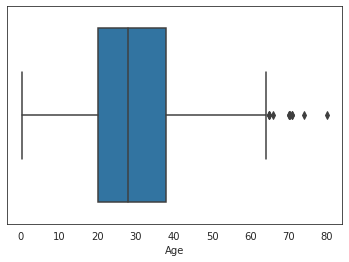

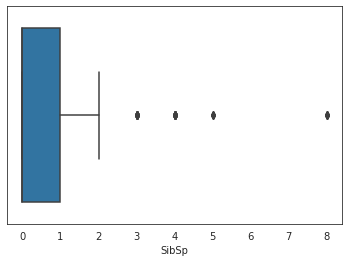

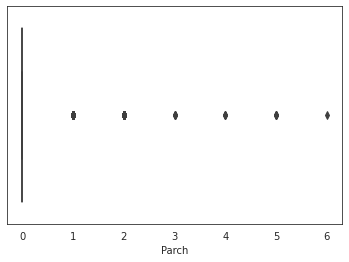

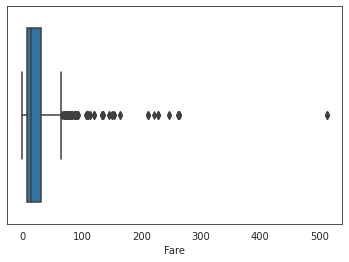

In [ ]:
for feature in numeric_features:
  sns.boxplot(x = feature, data = df)
  plt.show()

### Feature Selection

In [ ]:
df_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


From the available features, Cabin isn't giving much information and also has too many missing values which we imputed forwardfilling the data. So, we can remove the Cabin Feature

In [ ]:
df_copy = df_copy.drop('Cabin', axis= 1)

Name is also another feature which doesn't help us in the predition of our survival. so, we'll drop the Name feature also

In [ ]:
df_copy = df_copy.drop('Name', axis=1)

In [ ]:
df_copy.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Ticket Column is also not a useful column and we can remove it

In [ ]:
df_copy = df_copy.drop('Ticket', axis=1)

In [ ]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Train and Test Data Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = df_copy.drop('Survived', axis=1)
target = df_copy['Survived']

In [ ]:
features_Train, features_Test, target_Train, target_Test = train_test_split(features, target, test_size= 0.30, random_state=987)

In [ ]:
print('Features Train - ', features_Train.shape)
print('Features Test - ', features_Test.shape)
print('Target Train - ', target_Train.shape)
print('Target Test - ', target_Test.shape)

Features Train -  (623, 11)
Features Test -  (268, 11)
Target Train -  (623,)
Target Test -  (268,)


In [ ]:
target_Train.value_counts(normalize=True) * 100

0    63.242376
1    36.757624
Name: Survived, dtype: float64

In [ ]:
target_Test.value_counts(normalize=True) * 100

0    57.835821
1    42.164179
Name: Survived, dtype: float64

In [ ]:
df_copy.to_csv('cleaned_titanic.csv')

In [ ]:
df_copy = pd.read_csv('final_titatic_data.csv')

From the Above, we can observe that % of Target Variables in Both Train and Test Set is Similar which is around 60%

In [ ]:
df_copy.dtypes

Unnamed: 0      int64
Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
dtype: object

From the Features we selected for final modelling, we have 2 Features which are categorical which we'll need to convert into numerical since most models accept numeric input features.

In [29]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

For the Sex Column, Since we have Only 2 Values Either Male or Female we can use LabelEncoder and convert the Column.

For the Embarked Column, since we have 3 values, we'll use OneHotEncoder to convert it.

In [ ]:
labelEncoder = LabelEncoder()
df_copy['Sex'] = labelEncoder.fit_transform(df_copy['Sex'])
df_copy.dtypes

Unnamed: 0      int64
Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
dtype: object

In [ ]:
df_copy.Sex.unique()

array([1, 0])

In [ ]:
OHEncoder = OneHotEncoder()
embarked_columns_encoded = OHEncoder.fit_transform(df_copy['Embarked'].values.reshape(-1, 1)).toarray()
embarked_coded = pd.DataFrame(embarked_columns_encoded, columns=["Embarked_" + str(int(i)) for i in range(embarked_columns_encoded.shape[1])])
df_copy = df_copy.join(embarked_coded)
df_copy.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_0,Embarked_1,Embarked_2
0,0,0,3,1,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,1,0,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,2,1,3,0,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,3,1,1,0,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,4,0,3,1,35.0,0,0,8.0500,S,0.0,0.0,1.0


In [ ]:
df_copy = df_copy.drop('Embarked', axis=1)

In [ ]:
df_copy.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
0,0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [ ]:
df.to_csv('final_titatic_data.csv', index=False)

In [ ]:
df_copy = pd.read_csv('final_titatic_data.csv')

Finally, we have the Cleaned Data and ENcoded Data which can be used for Modelling the Data

## Data Modelling and Hyper Parameters Tuning and Performance Evaluation

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix, roc_curve, confusion_matrix, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [10]:
df = pd.read_csv('final_titatic_data.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
features = df.drop('Survived', axis=1)
target = df.Survived
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.30, random_state=1234)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [12]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print(Y_train.value_counts(normalize=True), Y_test.value_counts(normalize=True))

(623, 9) (268, 9) (623,) (268,)
0    0.614767
1    0.385233
Name: Survived, dtype: float64 0    0.619403
1    0.380597
Name: Survived, dtype: float64


In [13]:
pipelines = {
    'tree': make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1234)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1234)),
    'lr': make_pipeline(StandardScaler(), LogisticRegression(random_state=1234)),
    'svm': make_pipeline(StandardScaler(), svm.SVC(random_state=1234)),
    'gb': make_pipeline(StandardScaler(), GaussianNB())
}

In [19]:

tree_hyperparameters = {
    'decisiontreeclassifier__splitter': ['best', 'random'],
    'decisiontreeclassifier__max_features': list(range(1, X_train.shape[1])),
    'decisiontreeclassifier__min_samples_split': np.linspace(1, 10, 10, endpoint=True),
    'decisiontreeclassifier__min_samples_leaf': np.linspace(0.1, 0.5, 10, endpoint=True),
    'decisiontreeclassifier__max_depth': np.linspace(1, 32, 32, endpoint=True)
}
rf_hyperparameters = {
    'randomforestclassifier__min_samples_split': np.linspace(1, 10, 10, endpoint=True),
    'randomforestclassifier__min_samples_leaf': np.linspace(0.1, 0.5, 10, endpoint=True),
    'randomforestclassifier__max_depth': np.linspace(10, 110, 11),
    'randomforestclassifier__max_features': ['auto', 'sqrt'],
    'randomforestclassifier__bootstrap': [True, False]
}
svm_hyperparameters = {
    'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svc__kernel': ['linear'], #['rbf', 'linear', 'poly', 'sigmoid'],
    'svc__C': [0.1, 1, 10, 100, 1000]
}

lr_hyperparameters = {
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logisticregression__C': np.linspace(-4, 4, 20),
    'logisticregression__max_iter': [100, 1000, 10000],
    'logisticregression__solver': ['lbfgs','newton-cg','liblinear','sag','saga']
}

gb_hyperparameters = {
    
}

hyperparameters = {
    'tree': tree_hyperparameters,
    'rf': rf_hyperparameters,
    'svm': svm_hyperparameters,
    'lr': lr_hyperparameters,
    'gb': gb_hyperparameters
}

In [ ]:
fitted_models = {}

for name, pipeline in pipelines.items():
  model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
  model.fit(X_train, Y_train)
  print(name, "model is fitted")
  fitted_models[name] = model

tree model is fitted
rf model is fitted
lr model is fitted
svm model is fitted
gb model is fitted


In [15]:
# Fit the LR Model

model = GridSearchCV(pipelines['lr'], hyperparameters['lr'], cv=10, n_jobs=-1)
model.fit(X_train, Y_train)
print("Logistic Regression Model is fitted")

Logistic Regression Model is fitted


In [23]:
predicted = model.predict(X_test)
print(accuracy_score(Y_test, predicted))

0.8283582089552238


In [20]:
svmModel = GridSearchCV(pipelines['svm'], hyperparameters['svm'], cv=10, n_jobs=-1)
svmModel.fit(X_train, Y_train)
print("SVM Model is fitted")

SVM Model is fitted


In [22]:
prdicted = svmModel.predict(X_test)
print(accuracy_score(Y_test, prdicted))

0.8171641791044776


In [ ]:
import pickle

with open('fitted_models.pkl', 'wb') as f:
  pickle.dump(fitted_models, f)

In [ ]:
for name, model in fitted_models.items():
  print('Model - ', name)
  pred = model.predict(X_test)
  print("Accuracy Score -", accuracy_score(Y_test, pred))
  print()

Model -  tree
Accuracy Score - 0.8097014925373134

Model -  rf
Accuracy Score - 0.7723880597014925

Model -  lr
Accuracy Score - 0.8246268656716418

Model -  svm
Accuracy Score - 0.832089552238806

Model -  gb
Accuracy Score - 0.7723880597014925



In [ ]:
model_performance = {}

for name, model in fitted_models.items():
  model_performance[name] = {}
  pred = model.predict(X_test)
  model_performance[name]['Accuracy Score'] = accuracy_score(Y_test, pred)
  model_performance[name]['Precision Score'] = precision_score(Y_test, pred)
  model_performance[name]['Recall Score'] = precision_score(Y_test, pred)
  model_performance[name]['F1 Score'] = f1_score(Y_test, pred)

 

In [ ]:
performance_list = [['Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']]
for name, performance in model_performance.items():
  metrics = list()
  metrics.append(name)
  metrics.append(performance['Accuracy Score'])
  metrics.append(performance['Precision Score'])
  metrics.append(performance['Recall Score'])
  metrics.append(performance['F1 Score'])
  performance_list.append(metrics)

column_names = performance_list.pop(0)

df_performance = pd.DataFrame(performance_list, columns=column_names)
df_performance.Model.replace('tree', 'Decision Tree', inplace=True)
df_performance.Model.replace('rf', 'Random Forest', inplace=True)
df_performance.Model.replace('lr', 'Logistic Regression', inplace=True)
df_performance.Model.replace('svm', 'Support Vector Machines', inplace=True)
df_performance.Model.replace('gb', 'Gaussian Naive Bayes', inplace=True)
df_performance.head()

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Decision Tree,0.809701,0.793103,0.793103,0.730159
1,Random Forest,0.772388,0.976744,0.976744,0.579310
2,Logistic Regression,0.824627,0.795699,0.795699,0.758974
3,Support Vector Machines,0.832090,0.870130,0.870130,0.748603
4,Gaussian Naive Bayes,0.772388,0.720430,0.720430,0.687179


In [ ]:
def model_train(model, model_name):
  model.fit(X_train, Y_train)
  predicted = model.predict(X_test)
  confusion = confusion_matrix(Y_test, predicted)
  plot_confusion_matrix(model, X_test, Y_test, display_labels=['Survived', 'Not Survived'], cmap=plt.cm.Blues)
  print(f"{model_name} - ")
  print("Accuracy - ", accuracy_score(Y_test, predicted))
  print("Sensitivity/ Recall Score - ", recall_score(Y_test, predicted))
  print("Precision Score - ", precision_score(Y_test, predicted))
  print("F1 Score - ", f1_score(Y_test, predicted))
  print("ROC Curve - ")
  plot_roc_curve(model, X_test, Y_test)
  plt.show()
  return model

In [ ]:
target_Test.value_counts(normalize=True) * 100

0    57.835821
1    42.164179
Name: Survived, dtype: float64

We can see that Our Test Data Set has a reasonably good balance of Target Feature classes.  

#### Decision Tree Modelling

UnRestricted Decision Tree - 
Accuracy -  0.7574626865671642
Sensitivity/ Recall Score -  0.7254901960784313
Precision Score -  0.6666666666666666
F1 Score -  0.6948356807511736
ROC Curve - 


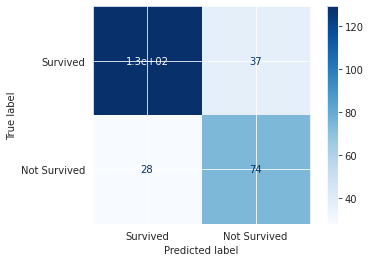

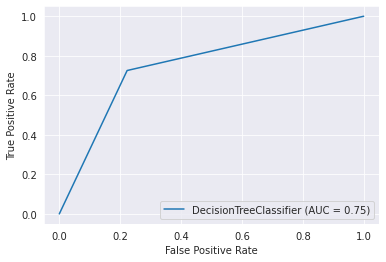

In [ ]:
unrestricted_model = DecisionTreeClassifier(random_state=123, criterion='gini', splitter='best')
dt_model = model_train(unrestricted_model, "UnRestricted Decision Tree")

1.0


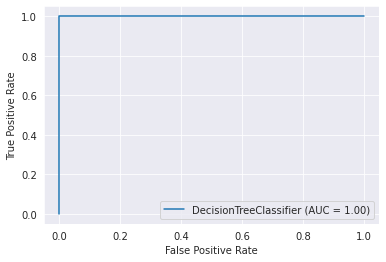

In [ ]:
predicted = dt_model.predict(X_train)
plot_roc_curve(dt_model, X_train, Y_train)
print(accuracy_score(Y_train, predicted))

For an UnRestricted Decision Tree Model, we have a decent F1 Score of 0.7 and Accuracy of 75%

#### Random Forest Modelling

Random Forest Classifier - 
Accuracy -  0.8059701492537313
Sensitivity/ Recall Score -  0.6991150442477876
Precision Score -  0.8144329896907216
F1 Score -  0.7523809523809524
ROC Curve - 


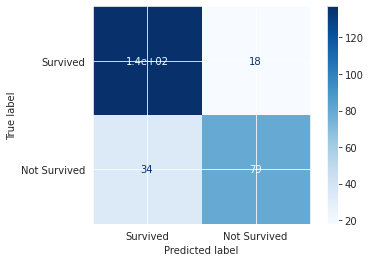

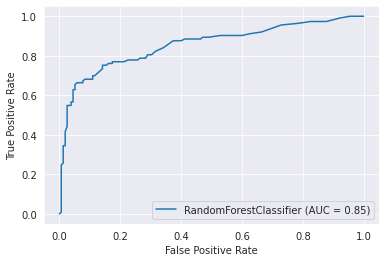

In [ ]:
random_forest = RandomForestClassifier(random_state=123, criterion='gini')
random_forest = model_train(random_forest, "Random Forest Classifier")

For an UnRestricted RandomForest Classifier, we have an F1 Score of 0.75 and Accuracy of 80% which is much better compared to the UnRestricted Decision Tree model

#### Logistic Regression Classifier Modelling

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression - 
Accuracy -  0.8097014925373134
Sensitivity/ Recall Score -  0.7345132743362832
Precision Score -  0.7980769230769231
F1 Score -  0.7649769585253456
ROC Curve - 


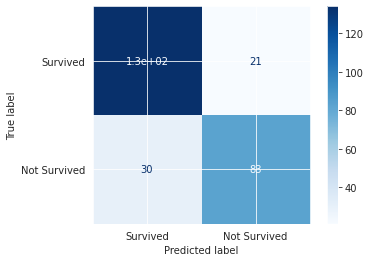

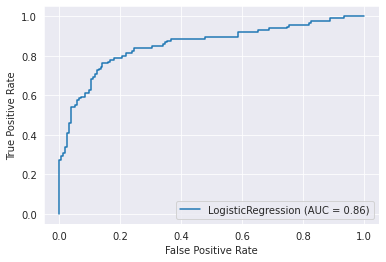

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_train(LogisticRegression(max_iter=100), "Logistic Regression")

Logistic Regression - 
Accuracy -  0.835820895522388
Sensitivity/ Recall Score -  0.7787610619469026
Precision Score -  0.822429906542056
F1 Score -  0.7999999999999999
ROC Curve - 


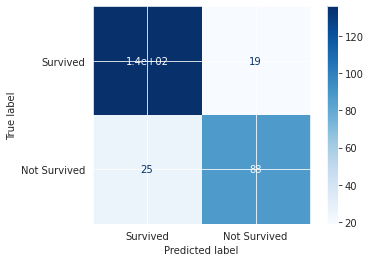

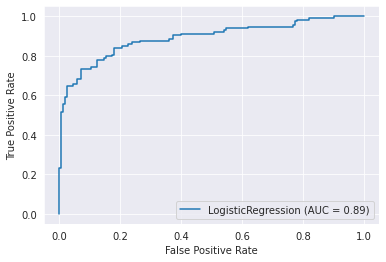

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_train(LogisticRegression(max_iter=10000), "Logistic Regression")

Logistic Regression - 
Accuracy -  0.835820895522388
Sensitivity/ Recall Score -  0.7787610619469026
Precision Score -  0.822429906542056
F1 Score -  0.7999999999999999
ROC Curve - 


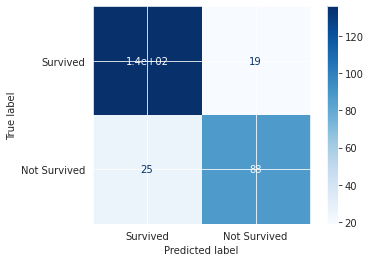

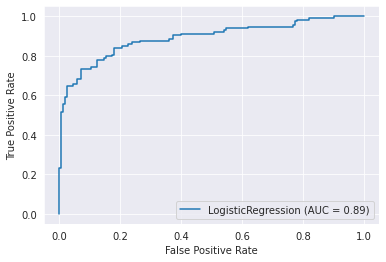

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_train(LogisticRegression(max_iter=1000000), "Logistic Regression")

Modelling the Data using Logistic Regression, we get Accuracy of 83%. Though we increase iterations from 1k to 100k we arn't getting any better accuracy. 

For the Logistic Regression, We can observe that, for 1000 Observations it failed to get the best fit and as we increase 10000 we get the best fit with Accuracy fo 83% and after that even if we increase the iterations, it no longer has effect on the performance of the model

So far, Logistic Regression has the best Accuracy and F1 Score 

#### SVM

SVM - Linear Kernel - 
Accuracy -  0.8283582089552238
Sensitivity/ Recall Score -  0.7345132743362832
Precision Score -  0.8383838383838383
F1 Score -  0.7830188679245284
ROC Curve - 


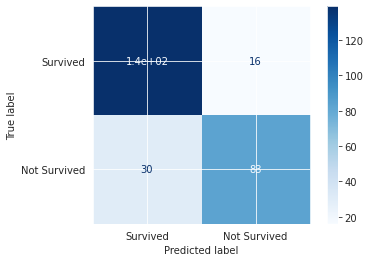

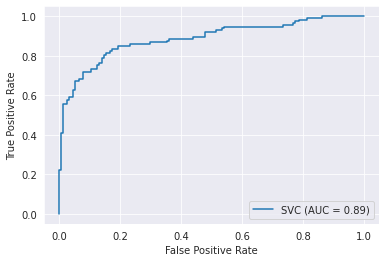

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_train(svm.SVC(kernel='linear'), 'SVM - Linear Kernel')

SVM - Polynomial Kernel - 
Accuracy -  0.6194029850746269
Sensitivity/ Recall Score -  0.18584070796460178
Precision Score -  0.6774193548387096
F1 Score -  0.2916666666666667
ROC Curve - 


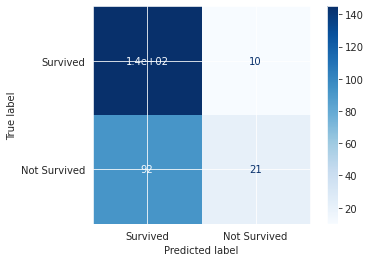

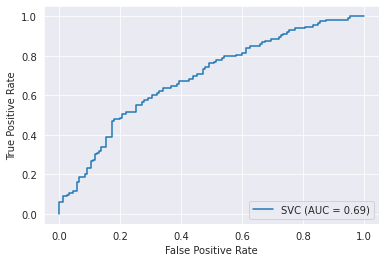

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_train(svm.SVC(kernel='poly'), 'SVM - Polynomial Kernel')

SVM - RBF Kernel - 
Accuracy -  0.6082089552238806
Sensitivity/ Recall Score -  0.12389380530973451
Precision Score -  0.7
F1 Score -  0.2105263157894737
ROC Curve - 


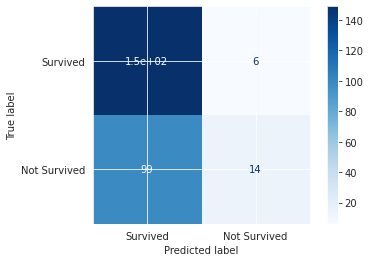

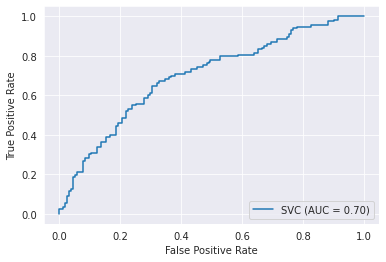

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_train(svm.SVC(kernel='rbf'), 'SVM - RBF Kernel')

SVM - Sigmoid Kernel - 
Accuracy -  0.5186567164179104
Sensitivity/ Recall Score -  0.3274336283185841
Precision Score -  0.4111111111111111
F1 Score -  0.3645320197044335
ROC Curve - 


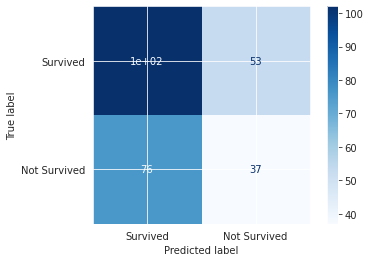

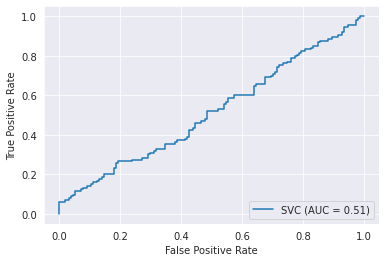

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_train(svm.SVC(kernel='sigmoid'), 'SVM - Sigmoid Kernel')

For the SVM, Among all the Kernels we have modelled, we can observe that Linear Kernel has the Best Accuracy and F1 Score and SVM Model came close to the Logistic Regression model in terms of performance though it lost by a little to Logistic Regression

#### Naive Bayes Modelling

Gaussian NB Model - 
Accuracy -  0.7985074626865671
Sensitivity/ Recall Score -  0.7610619469026548
Precision Score -  0.7610619469026548
F1 Score -  0.7610619469026548
ROC Curve - 


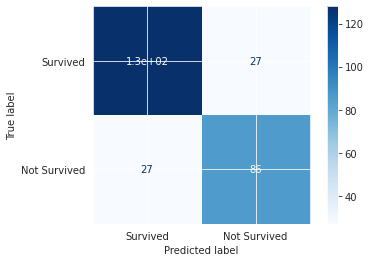

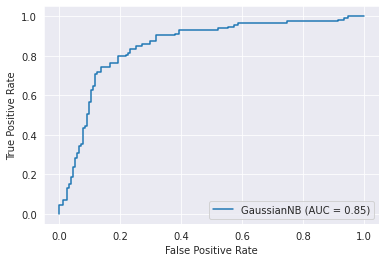

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
model_train(GaussianNB(), 'Gaussian NB Model')

Gaussian NB model has also performed pretty well but still Logistic Regression and SVM have better performance

From All the Above models, We can Observe that, 

Logistic Regression performed the Best followed by SVM Model

We have Taken the Following into consideration for the Model Performance -

- Accuracy Score since our Test Data Set has a good mix of Target Variable of 57% & 43% of classes

- F1 Score since we are interested in both Precision and Recall of the Model

In [ ]:
fitted_models = pd.read_pickle('fitted_models.pkl')
fitted_models['lr']

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_cla

In [24]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
test.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

In [27]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S


In [30]:
OHEncoder = OneHotEncoder()
embarked_columns_encoded = OHEncoder.fit_transform(test['Embarked'].values.reshape(-1, 1)).toarray()
embarked_coded = pd.DataFrame(embarked_columns_encoded, columns=["Embarked_" + str(int(i)) for i in range(embarked_columns_encoded.shape[1])])
test = test.join(embarked_coded)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_0,Embarked_1,Embarked_2
0,3,male,34.5,0,0,330911,7.8292,Q,0.0,1.0,0.0
1,3,female,47.0,1,0,363272,7.0000,S,0.0,0.0,1.0
2,2,male,62.0,0,0,240276,9.6875,Q,0.0,1.0,0.0
3,3,male,27.0,0,0,315154,8.6625,S,0.0,0.0,1.0
4,3,female,22.0,1,1,3101298,12.2875,S,0.0,0.0,1.0


In [31]:
labelEncoder = LabelEncoder()
test['Sex'] = labelEncoder.fit_transform(test['Sex'])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,0,0,330911,7.8292,Q,0.0,1.0,0.0
1,3,0,47.0,1,0,363272,7.0000,S,0.0,0.0,1.0
2,2,1,62.0,0,0,240276,9.6875,Q,0.0,1.0,0.0
3,3,1,27.0,0,0,315154,8.6625,S,0.0,0.0,1.0
4,3,0,22.0,1,1,3101298,12.2875,S,0.0,0.0,1.0


In [32]:
test = test.drop('Ticket', axis=1)

In [38]:
test.head()
test = test.drop('Embarked', axis=1)

In [39]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0


In [44]:
test.isnull().sum()

Pclass         0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked_0     0
Embarked_1     0
Embarked_2     0
dtype: int64

In [45]:
test.Age = test.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.mean()))

In [46]:
test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked_0    0
Embarked_1    0
Embarked_2    0
dtype: int64

In [49]:
test[test.Fare.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
152,3,1,60.5,0,0,NaN,0.0,0.0,1.0


In [51]:
test.groupby('Pclass').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,107.0,94.280297,84.435858,0.0000,30.10,60.0000,134.5,512.3292
2,93.0,22.202104,13.991877,9.6875,13.00,15.7500,26.0,73.5000
3,217.0,12.459678,10.803698,3.1708,7.75,7.8958,14.4,69.5500


In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [53]:
df.groupby('Pclass').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [54]:
test['Fare'].fillna(13.675550, inplace=True)

In [58]:
test_copy = pd.read_csv('test.csv')
test_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
predicted = model.predict(test)

In [59]:
predicted_df = pd.DataFrame({'PassengerId': test_copy['PassengerId'], 'Survived': predicted})
predicted_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [60]:
predicted_df.to_csv('final_submission.csv', index=False)